Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, I am working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, I will identify patterns, outliers, and correlations in the data, allowing me to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Import the Libraries

## !! pip install pandas geopandas matplotlib

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)
import matplotlib.pyplot as plt

In [2]:
## Load the Data

In [3]:
# Loading Data into the dataframe
df = pd.read_csv("Online Retail.csv")


## Data Cleaning and Exploration

In [4]:
# Display top 5 rows
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# Display bottom 5 rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
# Converting the datatypes
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors = 'coerce')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

InvoiceNo             float64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [8]:
# Convert 'InvoiceDate' to datetime-like object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Separate InvoiceDate to Date and Time columns
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time

In [9]:
# Dropping the InvoiceDate Column
df.drop(columns = ['InvoiceDate'])

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365.0,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...
541904,581587.0,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,2011-12-09,12:50:00
541905,581587.0,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,2011-12-09,12:50:00
541906,581587.0,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,2011-12-09,12:50:00
541907,581587.0,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,2011-12-09,12:50:00


In [10]:
df.shape

(541909, 10)

In [11]:
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
count,532618.000000,541909.000000,541909,541909.000000,406829.000000
mean,559965.752027,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,536365.000000,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,547906.000000,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,560688.000000,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,571841.000000,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,581587.000000,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,13428.417281,218.081158,NaN,96.759853,1713.600303


# Check the categorical/strings features of the dataset
categorical_features = df.select_dtypes(include=[np.object])
categorical_features

In [12]:
# Check for Duplicates
duplicate_rows_df = df[df.duplicated()]
print("The number of duplicate rows: ", duplicate_rows_df.shape)

The number of duplicate rows:  (5268, 10)


In [13]:
df.count() # Counting the nmber of rows

InvoiceNo      532618
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
Date           541909
Time           541909
dtype: int64

In [14]:
# Removing the duplicates
df = df.drop_duplicates()

In [15]:
df.count()

InvoiceNo      527387
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
Date           536641
Time           536641
dtype: int64

In [16]:
# Number of Unique Customers 
unique_customers = df['CustomerID'].nunique()
print(f"Number of unique CustomerIDs: {unique_customers}")

Number of unique CustomerIDs: 4372


In [17]:
# Check for missing or null values
print(df.isnull().sum())

InvoiceNo        9254
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
Date                0
Time                0
dtype: int64


In [18]:
# Dropping the missing or null values
df = df.dropna() 
df.count()

InvoiceNo      392732
StockCode      392732
Description    392732
Quantity       392732
InvoiceDate    392732
UnitPrice      392732
CustomerID     392732
Country        392732
Date           392732
Time           392732
dtype: int64

In [19]:
# # Rechecking the missing or null values
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Time           0
dtype: int64


In [20]:
# Get the list of column names
columns = list(df.columns)
df.dtypes

InvoiceNo             float64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
Time                   object
dtype: object

In [21]:
# Convert 'Date' column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Time' column to datetime datatype with a specific format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [22]:
# Move the datetime columns to the right
datetime_columns = [col for col in columns if df[col].dtype == 'datetime64[ns]']
other_columns = [col for col in columns if col not in datetime_columns]

new_order = other_columns + datetime_columns
df = df.reindex(columns=new_order)

In [23]:
# Create a new column 'TotalPrice' by multiplying 'Quantity' and 'Price'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [24]:
# Move the 'TotalPrice' column to come after the 'UnitPrice' column
cols = df.columns.tolist()
total_price_index = cols.index('TotalPrice')
unit_price_index = cols.index('UnitPrice')
cols.insert(unit_price_index + 1, cols.pop(total_price_index))

In [25]:
# Since we already have the DataFrame 'df' with the desired columns
# Find the index of the 'Description' column
description_index = df.columns.get_loc('Description')

# Insert the 'Country' column right after the 'Description' column
df.insert(description_index + 1, 'Country', df.pop('Country'))

In [26]:
# Since we already have the DataFrame 'df' with the desired columns
# Find the index of the 'Description' column
description_index_customer = df.columns.get_loc('StockCode')

# Insert the 'Country' column right after the 'Description' column
df.insert(description_index_customer + 1, 'CustomerID', df.pop('CustomerID'))

In [27]:
# Since we already have the DataFrame 'df' with the desired columns
# Find the index of the 'Description' column
description_index_total = df.columns.get_loc('UnitPrice')

# Insert the 'Country' column right after the 'Description' column
df.insert(description_index_total + 1, 'TotalPrice', df.pop('TotalPrice'))

In [28]:
df.dtypes

InvoiceNo             float64
StockCode              object
CustomerID            float64
Description            object
Country                object
Quantity                int64
UnitPrice             float64
TotalPrice            float64
InvoiceDate    datetime64[ns]
Date           datetime64[ns]
Time           datetime64[ns]
dtype: object

In [29]:
# Extract the time part (HH:MM:SS) from the datetime
df['Time'] = df['Time'].dt.strftime('%H:%M:%S')

In [30]:
df.drop(columns = ['InvoiceDate'], inplace = True)

In [31]:
# Create a new column 'MonthYear' with the month and year only for Data Visualization
df['MonthYear'] = df['Date'].dt.to_period('M').copy()

# Print the DataFrame with the 'MonthYear' column
df

,InvoiceNo,StockCode,CustomerID,Description,Country,Quantity,UnitPrice,TotalPrice,Date,Time,MonthYear
0,536365.0,85123A,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,6,2.55,15.30,2010-12-01,08:26:00,2010-12
1,536365.0,71053,17850.0,WHITE METAL LANTERN,United Kingdom,6,3.39,20.34,2010-12-01,08:26:00,2010-12
2,536365.0,84406B,17850.0,CREAM CUPID HEARTS COAT HANGER,United Kingdom,8,2.75,22.00,2010-12-01,08:26:00,2010-12
3,536365.0,84029G,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,6,3.39,20.34,2010-12-01,08:26:00,2010-12
4,536365.0,84029E,17850.0,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,6,3.39,20.34,2010-12-01,08:26:00,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587.0,22613,12680.0,PACK OF 20 SPACEBOY NAPKINS,France,12,0.85,10.20,2011-12-09,12:50:00,2011-12
541905,581587.0,22899,12680.0,CHILDREN'S APRON DOLLY GIRL,France,6,2.10,12.60,2011-12-09,12:50:00,2011-12
541906,581587.0,23254,12680.0,CHILDRENS CUTLERY DOLLY GIRL,France,4,4.15,16.60,2011-12-09,12:50:00,2011-12
541907,581587.0,23255,12680.0,CHILDRENS CUTLERY CIRCUS PARADE,France,4,4.15,16.60,2011-12-09,12:50:00,2011-12


In [32]:
# Calculating the summary statistics for 'Quantity', 'UnitPrice', and 'TotalPrice'
summary_stats = df[['Quantity', 'UnitPrice', 'TotalPrice']].describe()
print(summary_stats)

            Quantity      UnitPrice     TotalPrice
count  392732.000000  392732.000000  392732.000000
mean       13.153718       3.125596      22.629195
std       181.588420      22.240725     311.083465
min         1.000000       0.000000       0.000000
25%         2.000000       1.250000       4.950000
50%         6.000000       1.950000      12.390000
75%        12.000000       3.750000      19.800000
max     80995.000000    8142.750000  168469.600000


In [33]:
# Calculate the counts of uniques values in 'Country'
unique_country_count = df['Country'].nunique()

print(f"Number of unique countries: {unique_country_count}")


Number of unique countries: 37


## Data Analysis

### Analyzing to get the Busiest Month and Day of the Week for the retail store

In [34]:
# Create a copy of the 'Month' column
df['Month'] = df['MonthYear'].dt.month.values

# Create a copy of the 'DayOfWeek' column
df['DayOfWeek'] = df['Date'].dt.day_name().values

# Calculate gross sales for each month
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

# Calculate gross sales for each day of the week
daily_sales = df.groupby('DayOfWeek')['TotalPrice'].sum()

# Identify the busiest month
busiest_month = monthly_sales.idxmax()

# Identify the busiest day of the week
busiest_day = daily_sales.idxmax()

# Print the results
print("Busiest Month for the retail store's sales:", busiest_month)
print("Busiest Day of the Week for retail store's sales:", busiest_day)

Busiest Month for the retail store's sales: 11
Busiest Day of the Week for retail store's sales: Thursday


### Top 10 Most Valuable Customers

In [35]:
# Assuming you have already loaded your data into the DataFrame 'df'
# Calculate the gross purchase amount for each customer
customer_total_purchase = df.groupby('CustomerID')['TotalPrice'].sum()

# Sort the customers based on the gross purchase amount in descending order
most_valuable_customers = customer_total_purchase.sort_values(ascending=False)

# Get the total number of customers
total_customers = len(customer_total_purchase)

# Get the top 10 customers
top_10_customers = most_valuable_customers.head(10)

# Print the gross number of customers and the top 10 customers
print('\033[1m' + f"Among {total_customers} customers, the top 10 customers are:" +'\033[0m', list(top_10_customers.index))



Among 4339 customers, the top 10 customers are: [14646.0, 18102.0, 17450.0, 16446.0, 14911.0, 12415.0, 14156.0, 17511.0, 16029.0, 12346.0]


### Top 10 Most valuable Items

In [36]:
# Calculate the gross purchase amount for each item
item_total_purchase = df.groupby('Description')['TotalPrice'].sum()

# Sort the items based on the total purchase amount in descending order
most_valuable_items = item_total_purchase.sort_values(ascending=False)

# Get the top 10 most valuable items
top_10_items = most_valuable_items.head(10)

# Count the total number of unique items in 'df'
total_items = df['Description'].nunique()

# Print the total number of items and the top 10 items
print('\033[1m' + f"Among {total_items} items, the 10 most valuable items are:" +'\033[0m', list(top_10_items.index))


Among 3877 items, the 10 most valuable items are: ['PAPER CRAFT , LITTLE BIRDIE', 'REGENCY CAKESTAND 3 TIER', 'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT', 'MEDIUM CERAMIC TOP STORAGE JAR', 'POSTAGE', 'PARTY BUNTING', 'ASSORTED COLOUR BIRD ORNAMENT', 'Manual', 'RABBIT NIGHT LIGHT']


### Total sale value for each Country and top 10 most valuable Countries

In [37]:
# Calculate the total sales for each country
country_total_sales = df.groupby('Country')['TotalPrice'].sum()
country_total_sales_sorted = country_total_sales.sort_values(ascending=False)
print(country_total_sales_sorted)

Country
United Kingdom          7285024.644
Netherlands              285446.340
EIRE                     265262.460
Germany                  228678.400
France                   208934.310
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33375.840
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13502.850
Austria                   10198.680
Poland                     7334.650
Israel                     7215.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

In [38]:
# Calculate the total sales for each country
country_total_sales = df.groupby('Country')['TotalPrice'].sum()

# Sort countries based on the total sales in descending order
top_selling_countries = country_total_sales.sort_values(ascending=False)

# Get the top 10 selling countries
top_10_countries = top_selling_countries.head(10)

# Count the total number of unique countries in 'df'
total_countries = df['Country'].nunique()

# Print the total number of countries and the top 10 selling countries
print('\033[1m' + f"Among {total_countries} countries, the top 10 selling countries are:" +'\033[0m', list(top_10_countries.index))


Among 37 countries, the top 10 selling countries are: ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia', 'Spain', 'Switzerland', 'Belgium', 'Sweden']


## Data Visualization

### Line Chart to Discover the Trend of Total Price for Every Month

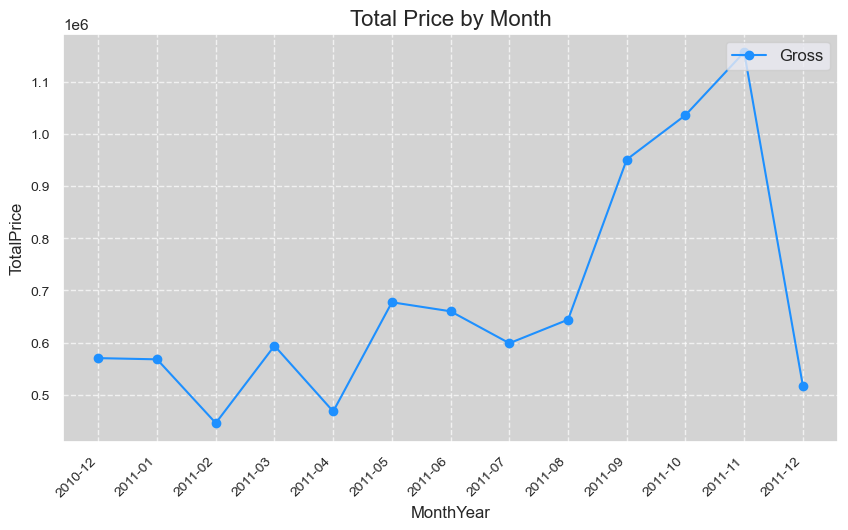

In [39]:
# Group the data by 'MonthYear' and calculate the TotalPrice for each month
monthly_data = df.groupby('MonthYear')['TotalPrice'].sum().reset_index()

# Convert the 'MonthYear' column to string format
monthly_data['MonthYear'] = monthly_data['MonthYear'].astype(str)

# Set the figure size using subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Automatic formatting to the x-axis labels when dealing with dates
fig.autofmt_xdate()

# Create a plot with markers and lines
plt.plot(monthly_data['MonthYear'], monthly_data['TotalPrice'], marker='o', linestyle='-', color='dodgerblue', label='Gross')

# Customize the plot
plt.title('Total Price by Month', fontsize=16)
plt.xlabel('MonthYear', fontsize=12)
plt.ylabel('TotalPrice', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12)

# Add a background color to the plot
ax.set_facecolor('lightgray')

# Add more colors and styles if needed
# Example: ax.spines['top'].set_color('none')

plt.show()  # Show the plot

### Heatmap to Visulaize the Correlation of the Quantitaive Data from the Dataset

In [40]:
df[['Quantity', 'UnitPrice', 'TotalPrice']].corr()

,Quantity,UnitPrice,TotalPrice
Quantity,1.000000,-0.004577,0.908873
UnitPrice,-0.004577,1.000000,0.081620
TotalPrice,0.908873,0.081620,1.000000


In [41]:
df.corr(numeric_only = True)

,InvoiceNo,CustomerID,Quantity,UnitPrice,TotalPrice,Month
InvoiceNo,1.000000,0.000785,-0.002503,-0.005233,-0.002263,0.674147
CustomerID,0.000785,1.000000,-0.006210,-0.010790,-0.003892,0.029641
Quantity,-0.002503,-0.006210,1.000000,-0.004577,0.908873,-0.003839
UnitPrice,-0.005233,-0.010790,-0.004577,1.000000,0.081620,-0.005065
TotalPrice,-0.002263,-0.003892,0.908873,0.081620,1.000000,-0.002563
Month,0.674147,0.029641,-0.003839,-0.005065,-0.002563,1.000000


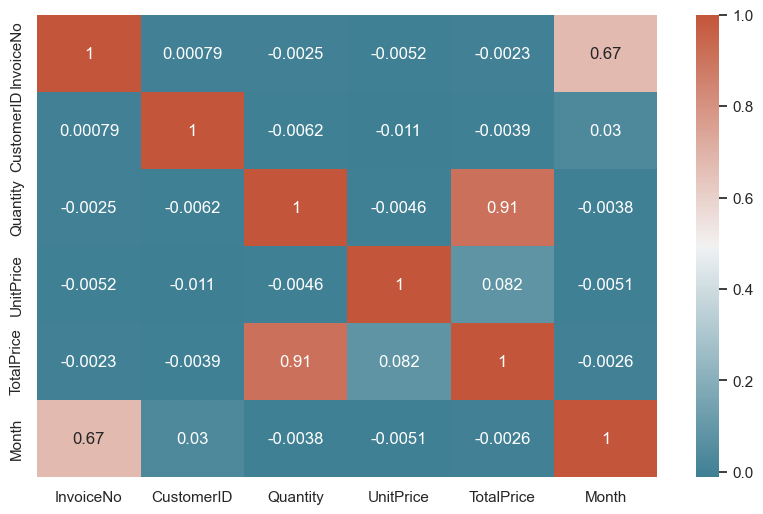

In [42]:
# Create a figure and set its size
plt.figure(figsize=(10, 6))

# Calculate the correlation matrix for specific numeric columns
corr = df.corr(numeric_only=True)

# Define a custom color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)  # Example color map

# Create a heatmap with annotations and the custom color map
sns.heatmap(corr, cmap=cmap, annot=True)

# Display the correlation matrix (optional)
corr

# Show the heatmap
plt.show()

### Bar chart to Visualize a comparison of the Total Value of Sales every day of the week

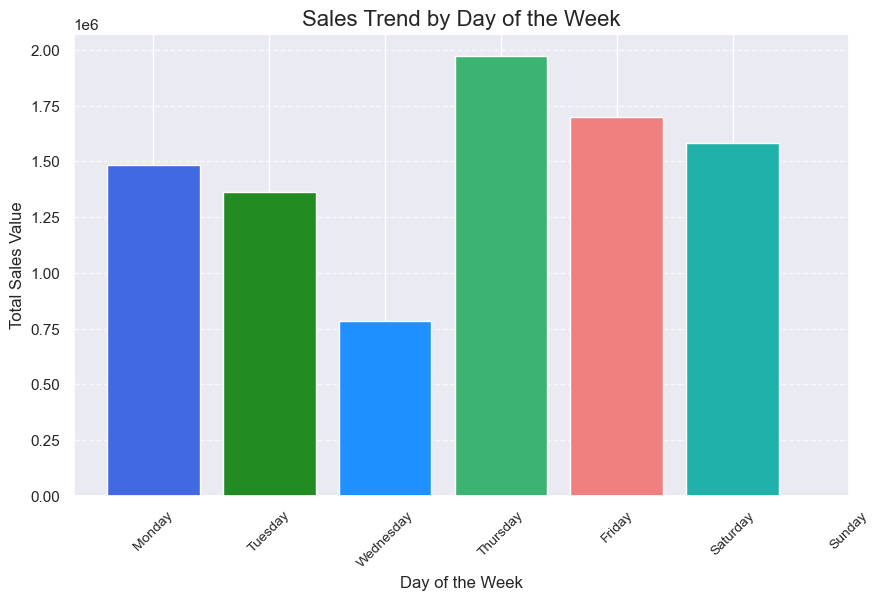

In [43]:
# Create a figure and set its size
plt.figure(figsize=(10, 6))

# Define the colors for the bars
colors = ['royalblue', 'forestgreen', 'dodgerblue', 'mediumseagreen', 'lightcoral', 'lightseagreen', 'orange']

# Create a bar plot
plt.bar(daily_sales.index, daily_sales.values, color=colors)

# Set labels and title
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.title('Sales Trend by Day of the Week', fontsize=16)

# Set custom x-axis labels
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(len(days_of_week)), days_of_week, rotation=45, fontsize=10)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Findings 

There is a strong postive correlation between Total Price (total sales value) and Quantity purchased, which is expected
Total Sales value increased considerably from December of 2010 to November 2011 (there was the highest spike between October and November 2011). This shows that the store getting known as time went by. The drop in sales value in 2011 Decmber could be as because the products that were purchsed most were out of stock, or something happened that damaged their reputation. 
Thursdays had the most sales. Also going to the weekend, there was a considerable high number of sales. Maybe, the most purchsed stock was available from Thursday, and it deccreased considerably up to Wednesday than there was a spike again on Thursday. 
United Kingdom had the most sales value.Actually the top countries that made most purchases (in value) were European Countries. Maybe because of proximity hence ease of transport or conveyance? 

## Conclusions

The store should focus on more marketing campaigns especially in European countries where the store is closer to the most clients and potential ones for that matter.
Ensure most purchsed items are always and consistenly in stock to avois the slump we see in December, which ideally should be the month with one of the highest sales values considering the products sold and the festivity and the idea around gift giving of these products.  
Consider opening storage spaces around locations where there is medium level of purchases since clients in these areas might have reservation due to a long time delivery time and not lack of purchasing power or their relatability with the strore's.